In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt 

In [7]:
import tensorflow as tf
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()

In [9]:
!pip install tensorflow

In [11]:
class_name=['T_shirt/top', 'Trouser' , 'Pullover' , 'Dress' , 'Coat', 'Sandal', 'Shirt' , 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
train_images.shape
test_images.shape
len(test_labels)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
!pip install matplotlib



In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images /255.0

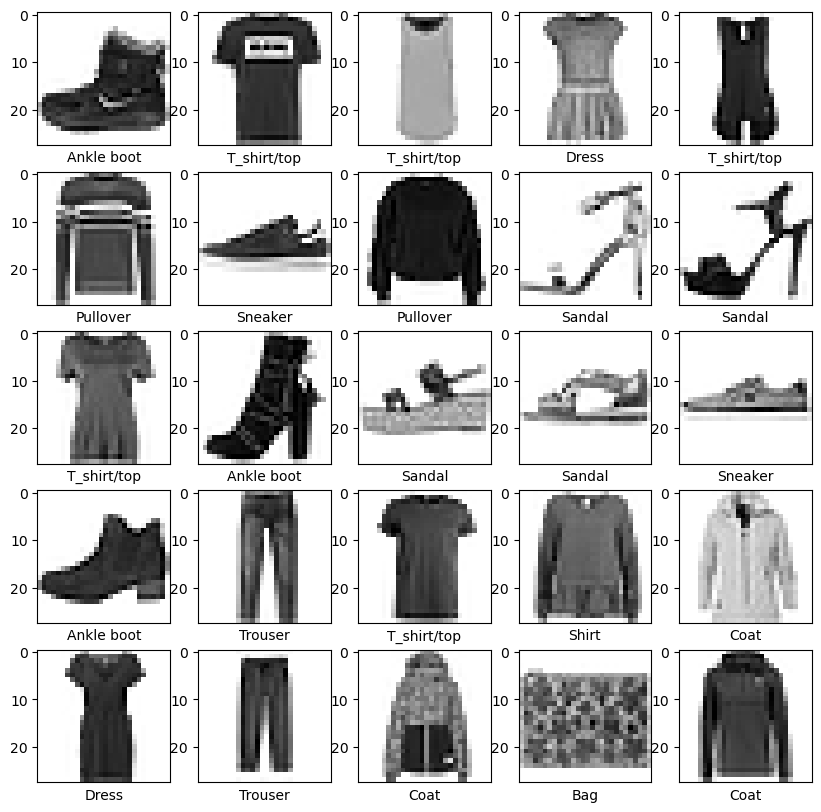

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)])

In [28]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7785 - loss: 0.6373
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8601 - loss: 0.3899
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8773 - loss: 0.3382
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8837 - loss: 0.3192
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8936 - loss: 0.2912
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8939 - loss: 0.2834
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8983 - loss: 0.2717
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9034 - loss: 0.2588
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9060 - loss: 0.2499
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9102 - loss: 0.2384


In [31]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8812 - loss: 0.3466

Test accuracy: 0.8812000155448914


In [34]:
probability_model=tf.keras.Sequential([model, tf.keras.layers.Softmax()]) 

In [36]:
predictions=probability_model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.3742769e-09, 1.7280373e-08, 1.0226671e-08, 1.5860228e-09,
       4.9008571e-07, 1.5871435e-03, 7.2104498e-08, 1.3845424e-02,
       9.3520720e-09, 9.8456687e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

9

In [42]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
   # plt.xlabel("{} {:2.0f} % ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar (range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax (predictions_array)
    thisplot [predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

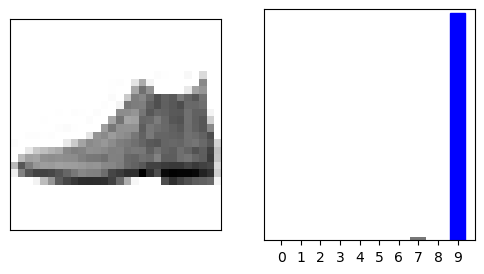

In [44]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

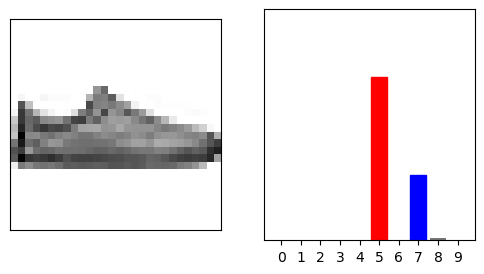

In [46]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [48]:
img=test_images[1]
print(img.shape)

(28, 28)


In [50]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [52]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[3.5002604e-06 7.4040522e-12 9.9729365e-01 9.4141396e-11 1.1991606e-03
  1.7205698e-13 1.5036906e-03 9.9198548e-16 7.2668169e-12 2.2906215e-12]]


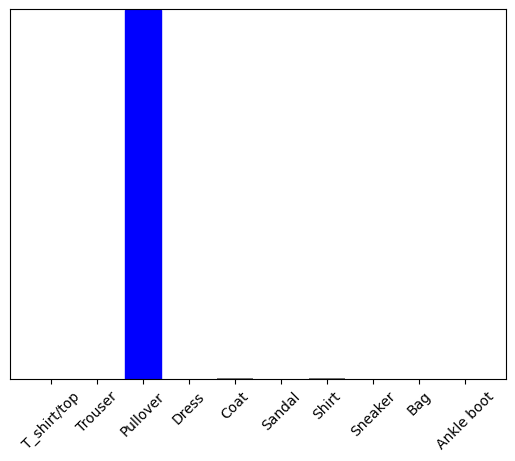

In [54]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10), class_name, rotation=45)
plt.show()

In [60]:
np.argmax(predictions_single[0])

2

In [107]:
# Save the model
model.save('model.h5')  # Save in HDF5 format (legacy Keras format)

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmph0sc2y71\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmph0sc2y71\assets


Saved artifact at 'C:\Users\hp\AppData\Local\Temp\tmph0sc2y71'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1784917832912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1784917833296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1784751077520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1784738518352: TensorSpec(shape=(), dtype=tf.resource, name=None)


### TP3

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [31]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense,Flatten

In [35]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [37]:
train_images,test_images,=train_images/255.0,test_images/255.0

In [33]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(train_images,train_labels,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7576 - loss: 0.6936 - val_accuracy: 0.8424 - val_loss: 0.4348
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8582 - loss: 0.3856 - val_accuracy: 0.8472 - val_loss: 0.4224
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8710 - loss: 0.3506 - val_accuracy: 0.8701 - val_loss: 0.3635
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8813 - loss: 0.3203 - val_accuracy: 0.8727 - val_loss: 0.3481
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8861 - loss: 0.3050 - val_accuracy: 0.8816 - val_loss: 0.3357
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8933 - loss: 0.2876 - val_accuracy: 0.8775 - val_loss: 0.3505
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8959 - loss: 0.2769 - val_accuracy: 0.8783 - val_loss: 0.3497
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9052 - loss: 0.2608 - 

In [43]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 0s - 889us/step - accuracy: 0.8757 - loss: 0.3670

Test accuracy: 0.8756999969482422


In [55]:
#CAS2
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [49]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.fit(train_images,train_labels,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6572 - loss: 1.0809 - val_accuracy: 0.7990 - val_loss: 0.5712
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8154 - loss: 0.5374 - val_accuracy: 0.8201 - val_loss: 0.5049
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8356 - loss: 0.4717 - val_accuracy: 0.8415 - val_loss: 0.4523
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8470 - loss: 0.4424 - val_accuracy: 0.8467 - val_loss: 0.4340
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8552 - loss: 0.4151 - val_accuracy: 0.8453 - val_loss: 0.4361
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8600 - loss: 0.3976 - val_accuracy: 0.8561 - val_loss: 0.4060
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8661 - loss: 0.3813 - val_accuracy: 0.8582 - val_loss: 0.4109
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8679 - loss: 0.3763 - 

In [53]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8599 - loss: 0.3972

Test accuracy: 0.8598999977111816


In [57]:
#CAS3
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit(train_images,train_labels,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6980 - loss: 1.0000 - val_accuracy: 0.8455 - val_loss: 0.4305
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8542 - loss: 0.4096 - val_accuracy: 0.8607 - val_loss: 0.3845
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8666 - loss: 0.3659 - val_accuracy: 0.8673 - val_loss: 0.3665
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8791 - loss: 0.3369 - val_accuracy: 0.8764 - val_loss: 0.3374
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8845 - loss: 0.3192 - val_accuracy: 0.8723 - val_loss: 0.3456
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8886 - loss: 0.3028 - val_accuracy: 0.8836 - val_loss: 0.3207
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8957 - loss: 0.2874 - val_accuracy: 0.8748 - val_loss: 0.3413
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8983 - loss: 0.2789 - 

In [63]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8805 - loss: 0.3299

Test accuracy: 0.8805000185966492


In [39]:
from tensorflow.keras.utils import to_categorical
train_images,test_images,=train_images/255.0,test_images/255.0

In [41]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [53]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='softmax')
])

In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [57]:
predictions=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [59]:
print(predictions)

[[0.03124452 0.03124963 0.03124375 ... 0.03123552 0.03125565 0.03124391]
 [0.03123935 0.03124835 0.03125691 ... 0.03121279 0.03124963 0.03127088]
 [0.03125485 0.03124708 0.03126375 ... 0.0312468  0.03127705 0.03125634]
 ...
 [0.03126985 0.03125183 0.03126048 ... 0.03125029 0.0312599  0.03125014]
 [0.0312562  0.03124532 0.03125832 ... 0.03123197 0.03125754 0.03126064]
 [0.03124181 0.03124598 0.03124302 ... 0.03124115 0.03125234 0.0312458 ]]
